# Exploration of the RWJF data

This exploration seeks to understand current levels of geographical, temporal, topical coverage


## Functions etc

In [288]:
import random

In [291]:
def flatten_list(lol): 
    '''
    Flatten a list
    
    '''
    return([x for el in lol for x in el])

#Get sample

def sample_obs(data,field,sample_size,text_length):
    '''
    Samples observations from a dataset for sense-checking
    
    '''
    
    rel = list(data[field])
    
    out = random.sample(rel,sample_size)
    
    for s in out:
        print('====')
        print(s[:text_length])
        print('\n')


## Load data

In [18]:
data = pd.read_csv('../data/external/all_data.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,7,8,9,10,12,15,17,18,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
data.shape

(7139561, 26)

In [20]:
data.columns = [re.sub(' ','_',x.lower()) for x in data.columns]

In [21]:
data.source_id.value_counts()

GitHub        5871898
Crunchbase     662238
GDB            357494
arxiv          247931
Name: source_id, dtype: int64

In [22]:
data.gdb_dataset_id.value_counts().sum()

357494

We have 357,000 observations outside of GitHUb, CrunchBase and arXIV

In [23]:
data.gdb_dataset_id.value_counts()

rgov              154318
gtr                79427
H2020              63125
innovateuk         31987
world_reporter     15089
rwjf                7227
ahrq                6321
Name: gdb_dataset_id, dtype: int64

## Focus on shared fields

In the case of funding, do we have data for the funders?

In [25]:
data.columns

Index(['unnamed:_0', 'cb_category_group_list', 'cb_category_list',
       'cb_number_of_employees', 'cb_role', 'currency', 'description',
       'end_date', 'funding', 'gdb_dataset_id', 'gh_user_creation_date',
       'gh_user_id', 'gh_user_type', 'gh_valid_description', 'name', 'row_id',
       'source_id', 'start_date', 'status', 'unnamed:_0.1',
       'administrative_area_level_1', 'administrative_area_level_2',
       'arxiv_categories', 'country', 'lat', 'lng'],
      dtype='object')

In [38]:
shared_columns = ['name','description','source_id','gdb_dataset_id','currency','funding','start_date','country']

In [44]:
data_sh = data[shared_columns]

In [45]:
data_sh.head()

,name,description,source_id,gdb_dataset_id,currency,funding,start_date,country
0,University College London,"Over the last fifty years, accelerators of eve...",GDB,gtr,GBP,26776,2012-10-01 00:00:00,United Kingdom
1,University College London,Abstracts are not currently available in GtR f...,GDB,gtr,GBP,187427,2002-02-01 00:00:00,United Kingdom
2,University College London,The question of how the human brain develops o...,GDB,gtr,GBP,3.00761e+06,1998-10-01 00:00:00,United Kingdom
3,University College London,T-cells are white blood cells that enable us t...,GDB,gtr,GBP,465999,2012-06-30 00:00:00,United Kingdom
4,University College London,"When excavators dug al-Bahnasa, some 200 km so...",GDB,gtr,GBP,851035,2010-09-01 00:00:00,United Kingdom


In [46]:
#Create a detailed source field
data_sh['source_det']  = [x if x!='GDB' else y for x,y in zip(data_sh.source_id,data_sh.gdb_dataset_id)]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [47]:
data_sh.source_det.value_counts()

GitHub            5871898
Crunchbase         662238
arxiv              247931
rgov               154318
gtr                 79427
H2020               63125
innovateuk          31987
world_reporter      15089
rwjf                 7227
ahrq                 6321
Name: source_det, dtype: int64

## Missing values

In [50]:
data_sh.groupby('source_det').apply(lambda x: 100*x.isna().mean())

,name,description,source_id,gdb_dataset_id,currency,funding,start_date,country,source_det
source_det,,,,,,,,,
Crunchbase,0.000453,0.004379,0.0,100.0,0.0,86.763822,31.406383,100.000000,0.0
GitHub,0.000153,0.000000,0.0,100.0,100.0,100.000000,0.000000,100.000000,0.0
H2020,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.004752,0.261386,0.0
ahrq,0.506249,0.000000,0.0,0.0,0.0,0.000000,0.601171,0.506249,0.0
arxiv,0.000000,0.000000,0.0,100.0,100.0,100.000000,0.000000,100.000000,0.0
gtr,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
innovateuk,0.000000,0.000000,0.0,0.0,0.0,5.177103,5.177103,0.550224,0.0
rgov,2.268692,0.000000,0.0,0.0,0.0,15.903524,0.000000,2.339973,0.0
rwjf,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,7.748720,0.0


We have missing data for some of the non-grant databases. I assume that this is because they haven't been geocoded yet

And obviously, some of the data lack information about funding etc.

### Check country distributions by location

In [76]:
country_data = data_sh.groupby('gdb_dataset_id')[
    'country'].apply(lambda x: x.value_counts(normalize=True).sort_values(ascending=False)[:20]).reset_index(drop=False)

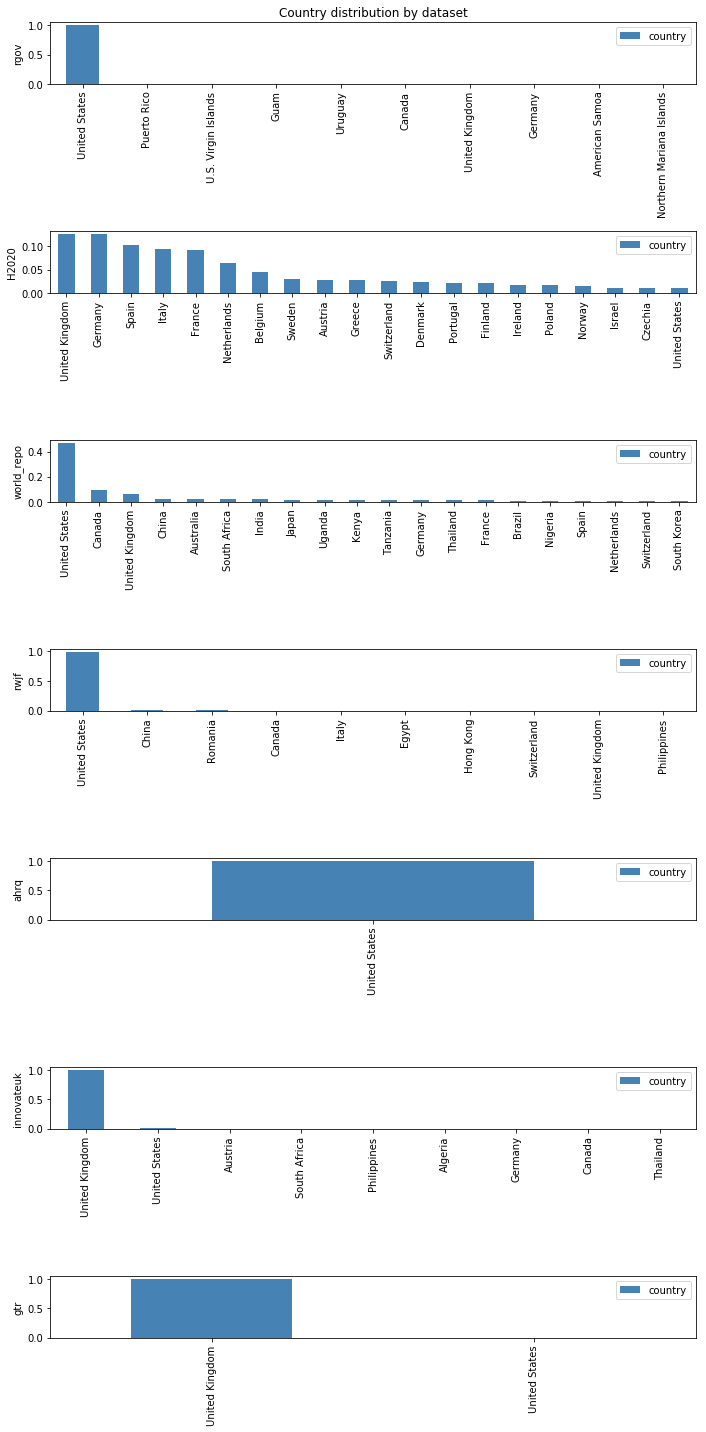

In [86]:
fig,ax = plt.subplots(figsize=(10,20),nrows=len(set(country_data.gdb_dataset_id)))


for num,source in enumerate(set(country_data.gdb_dataset_id)):
    
    rel_data = country_data.loc[country_data.gdb_dataset_id==source]
    
    rel_data.plot.bar(color='steelblue',ax=ax[num])
    ax[num].set_xticklabels(rel_data['level_1'])
    ax[num].set_ylabel(source[:10])
    
ax[0].set_title('Country distribution by dataset')
plt.tight_layout()
    

Our current coverage (excluding, in this case, GitHub and CrunchBase) is very dominated by the USA. We need to consider strategies to address this.

**Question:** Does the nationality data refer to the organisation doing the project or the country receiving the intervention?

In [ ]:
#Get them very lazily using a list of countries I got from here: http://www.fao.org/countryprofiles/iso3list/en/

In [242]:
from bs4 import BeautifulSoup

lazy_country_names = BeautifulSoup(requests.get('http://www.fao.org/countryprofiles/iso3list/en/').text)


/usr/local/lib/python3.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))


In [257]:
countries = [x.get_text().strip().lower() for x in lazy_country_names.find_all('td',class_='shortname')]

In [258]:
#Let's check on a dataset without GitHub and only descriptions

data_no_gh_descr = data_sh[data_sh.source_id!='GitHub'].dropna(axis=0,subset=['description'])

In [259]:
data_no_gh_descr['countries_in_descr'] = [[x for x in countries if x in text.lower()] for text in data_no_gh_descr['description']]

In [281]:
# How many descriptions mention a country?

sum([len(x)>0 for x in data_no_gh_descr.countries_in_descr])

116784

In [283]:
country_freqs = pd.Series(Counter(flatten_list(data_no_gh_descr['countries_in_descr']))).sort_values(ascending=False)

country_freqs.head(n=20)

mali              23905
india             14020
china              7511
australia          6063
japan              5429
canada             5215
germany            4645
france             4440
oman               4302
mexico             3672
brazil             3491
italy              3416
cuba               3393
spain              3310
georgia            2513
south africa       2137
united kingdom     2124
ireland            1991
netherlands        1894
singapore          1742
dtype: int64

In [300]:
#Let's have a look focusing on the world reporter data

sample_obs(data_no_gh_descr.loc[([len(x)>0 for x in data_no_gh_descr.countries_in_descr]) & (data_no_gh_descr.source_det=='world_reporter')],'description',5,800)

====
DESCRIPTION (provided by applicant):  Antiretroviral therapy (ART) provided to HIV-positive individuals can reduce transmission risk by 96%. In this context, identifying new strategies to optimize treatment as prevention (TasP) is a top Fiscal Year 2014 Trans- NIH Research Priority. There are important gaps in our knowledge of how to implement TasP in key populations including female sex workers (FSW). Effective TasP will require higher levels of ART adherence than those achieved in typical treatment programs. Mobile Health (mHealth) approaches employing interactive short message service (SMS) messages have shown promise as a method for improving ART adherence, leading to suppression of plasma HIV RNA. However, the ability of SMS interventions to support ART adherence in key populations li


====
DESCRIPTION (provided by applicant): This project is based on INIA-West studies showing changes in neuroimmune gene expression in animal models of alcohol intake and in brain of human alc

In [305]:
#Let's have a look focusing on the world reporter data

sample_obs(data_no_gh_descr.loc[([len(x)>0 for x in data_no_gh_descr.countries_in_descr]) & (data_no_gh_descr.source_det=='rgov')],'description',5,800)

====
The workshop will be organized in partnership with the center of Modelamiento Matem?tico (CMM) of the University of Chile in Santiago and will be held Jan. 3-5, 2013 at CMM in Santiago, Chile. The organizers are Matias Courdurier from the Pontificia Universidad Cat?lica de Chile, Jaime Ortega and Axel Osses from CMM and Gunther Uhlmann from the University of Washington. The focus of the conference will be on "coupled-physics" or "hybrid" imaging modalities that have received a lot of attention in recent years due to the great promises they hold for medical imaging and other fields. By combining two or three different types of waves (or physical fields) these methods overcome limitations of classical tomography techniques and deliver otherwise unavailable, potentially life-saving diagnostic


====
EXTROVERT: LEARNING TO INNOVATE ACROSS DISCIPLINES:This proposal under topic E.2 comes from a team that has been building and proving curricular innovations and resources to support learn

We are identifying some projects with beneficiaries in the countries being mentioned

### Check type of content by source

Token frequencies by data source.

Lets use Spacy.



In [135]:
from nltk.corpus import stopwords
from collections import Counter


In [231]:
from string import punctuation

#Drop stopwords and punctuation
sws = stopwords.words('english') + [x for x in punctuation]


In [232]:
def freq_distr(corpus,length=500):
    '''
    corpus
    '''
    
    tok = corpus.apply(lambda x: x.lower().split(' '))
    
    return (pd.Series([x for el in tok for x in el if x not in eng]).value_counts(normalize=True).sort_values(ascending=False)[:length])


    

In [234]:
%%time
top_toks = data_no_gh_descr.groupby('source_det')['description'].apply(lambda x: freq_distr(x))


CPU times: user 6min 17s, sys: 6.4 s, total: 6min 23s
Wall time: 6min 33s


In [238]:
top_toks_2 = top_toks.reset_index(drop=False)


for x in set(top_toks_2.source_det):
    print(x)
    print('====')
    
    print(', '.join([x for x in top_toks_2.loc[top_toks_2.source_det==x,'level_1']][:30]))
    print('\n')


rgov
====
, research, project, new, students, data, also, understanding, provide, science, study, development, work, use, high, using, program, develop, used, graduate, university, undergraduate, proposed, systems, important, well, materials, two, including, one


H2020
====
project, research, new, european, , data, energy, development, develop, innovation, based, use, innovative, provide, support, technology, system, also, high, systems, different, management, well, eu, key, market, technologies, network, knowledge, services


world_reporter
====
, research, health, clinical, new, hiv, data, study, patients, development, studies, aim, treatment, (provided, applicant):, specific, use, cell, cancer, using, also, provide, project, develop, training, disease, risk, program, cells, human


arxiv
====
show, data, problem, using, algorithm, based, model, results, also, paper, two, number, network, new, proposed, method, approach, one, used, propose, information, present, performance, time, s

The vocabulary reflect sources: some of them are much more focused on health, others are generalist

### Temporal coverage

In [306]:
data.groupby('source_det')['start_date'].apply(lambda x: list(x)[0:3])

source_det
Crunchbase                            [nan, 1968-07-18, 1968-01-01]
GitHub            [2017-08-27 17:03:00 UTC, 2017-03-03 20:52:23 ...
H2020                          [2016-03-01, 2017-05-01, 2017-04-01]
ahrq                                 [09/30/05, 09/30/13, 09/30/13]
arxiv                 [1241136000000, 1241136000000, 1044057600000]
gtr               [2012-10-01 00:00:00, 2002-02-01 00:00:00, 199...
innovateuk          [2017-08-01 00:00:00, 2017-10-01 00:00:00, nan]
rgov                  [="09/01/2017", ="09/01/2011", ="08/15/2010"]
rwjf                               [3/25/2009, 3/8/2010, 3/18/2011]
world_reporter                                      [nan, nan, nan]
Name: start_date, dtype: object

Dates are a mess

## Preliminary conclusions

* Our coverage is very focused on developed countries (for which we have founding) although we also detect activity in other countries through the abstract descriptions
* We mostly cover grants. Coverage of private-sector/applied/under-the-radar activity is much weaker
* The data include a mix of sources with health-specific data (AHRQ, RWJF, world-reporter) and generic research sources

## Next steps:

* Identify and collect data from other types of sources: crowdfunding, meetup activity, social innovation directories etc.
* Identify a strategy for research papers



